# **Build a logistics regression learning model on the given dataset to determine whether the customer will churn or not.**

# Project Description

## Business Objective

Predicting a qualitative response for observation can be referred to as classifying that observation since it involves assigning the observation to a category or class. Classification forms the basis for Logistic Regression. Logistic Regression is a supervised algorithm used to predict a dependent variable that is categorical or discrete. Logistic regression models the data using the sigmoid function.

Churned Customers are those who have decided to end their relationship with their existing company. In our case study, we will be working on a churn dataset.

XYZ is a service-providing company that provides customers with a one-year subscription plan for their product. The company wants to know if the customers will renew the subscription for the coming year or not.



## Data Description

This data provides information about a video streaming service company, where they want to predict if the customer will churn or not. The CSV consists of around 2000 rows and 16 columns.


Tech stack

    Language - Python
    Libraries - numpy, pandas, matplotlib, seaborn, sklearn, pickle, imblearn, statsmodel



Approach

    Importing the required libraries and reading the dataset.
    Inspecting and cleaning up the data
    Perform data encoding on categorical variables
    Exploratory Data Analysis (EDA)

        Data Visualization

    Feature Engineering

        Dropping of unwanted columns

    Model Building

        Using the statsmodel library

    Model Building

        Performing train test split
        Logistic Regression Model

    Model Validation (predictions)

        Accuracy score
        Confusion matrix
        ROC and AUC
        Recall score
        Precision score
        F1-score

    Handling the unbalanced data

        With balanced weights
        Random weights
        Adjusting imbalanced data
        Using SMOTE

    Feature Selection

        Barrier threshold selection
        RFE method

    Save the model in the form of a pickle file


**Loading the dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data = pd.read_csv('/content/data_regression.csv')

In [ ]:
df = data.copy()
df.shape

(2000, 16)

In [ ]:
# get the first 10 rows
df.head().append(df.tail())

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,2015,999961,414-1496,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


**Inspecting and cleaning up the frame**

In [ ]:
# check for the missing values and dataframes
def inspection(dataframe):
  print("Types of the variables we are working with:")
  print(dataframe.dtypes) # dtypes
  print("____"*10)
  print("Total Samples with missing values (ROWs):")
  print(df.isnull().any(axis=1).sum()) # null values
  print("____"*10)
  print("Total Missing Values per Variable (columns)")
  print(df.isnull().sum())
  print("____"*10)
  print("Map of missing values")
  sns.heatmap(dataframe.isnull())

Types of the variables we are working with:
year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object
________________________________________
Total Samples with missing values (ROWs):
82
________________________________________
Total Missing Values per Variable (columns)
year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed         

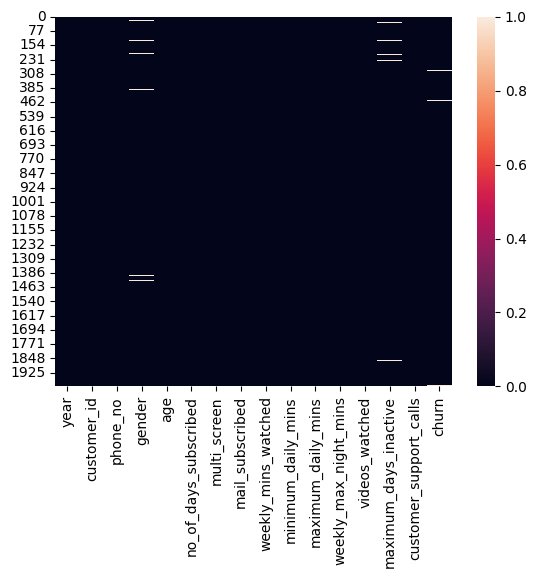

In [ ]:
inspection(df)

In [ ]:
82/df.shape[0]*100

4.1000000000000005

In [ ]:
df = df.dropna() # cleaning up null values
df.shape

(1918, 16)

In [ ]:
df.isna().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

**Encoding categorical variables**

In [ ]:
df.head(5)

df.multi_screen.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import VarianceThreshold
# Feature selector that removes all low-variance features.
# remove the features that have the same value in all samples.
selector = VarianceThreshold()
cols = df.select_dtypes(exclude='O').columns.tolist()
print(cols)
selector.fit_transform(df[cols])
sel_cols = df.select_dtypes(exclude='O').columns[selector.get_support()]
constant_columns = [column for column in cols if column not in sel_cols]

print("feature with 0.0 variance which is not useful for model training: ", constant_columns)

['year', 'customer_id', 'age', 'no_of_days_subscribed', 'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive', 'customer_support_calls', 'churn']
feature with 0.0 variance which is not useful for model training:  ['year']


In [ ]:
drop_cols = ['year', 'customer_id', 'phone_no']
df = df.drop(drop_cols, axis=1)
df.shape

(1918, 13)

In [ ]:
cat_cols = df.select_dtypes(include='O').columns.tolist()
print(cat_cols)
print("___"*10)
num_cols = df.select_dtypes(exclude='O').columns.tolist()
print(num_cols)

['gender', 'multi_screen', 'mail_subscribed']
______________________________
['age', 'no_of_days_subscribed', 'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive', 'customer_support_calls', 'churn']


In [ ]:
# function for encoding categorical variables
def encode_categories (df, variables):
  ord_enc = OrdinalEncoder()
  for v in variables:
    name = v+'_code' # add _code for encoded variables
    df[name] = ord_enc.fit_transform(df[[v]])
    print('The encoded values for '+ v + ' are:')
    print(df[name].unique())


# check for the encoded variables
# encode_categories (df,['gender','multi_screen','mail_subscribed'])
encode_categories(df, cat_cols)

The encoded values for gender are:
[0. 1.]
The encoded values for multi_screen are:
[0. 1.]
The encoded values for mail_subscribed are:
[0. 1.]


In [ ]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_code,multi_screen_code,mail_subscribed_code
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,0.0,0.0,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,0.0,0.0,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,0.0,0.0,0.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,0.0,0.0,1.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,0.0,0.0,0.0


In [ ]:
df[['gender', 'gender_code']].value_counts()

gender  gender_code
Male    1.0            1021
Female  0.0             897
dtype: int64

**Do some data visualizations**

In [ ]:
def plot_scatterplots (df,cols_to_exclude,class_col):
  #this function returns scatterplots of all the variables in the dataset
  #against the classification variable,
  #for a quick data visualization

  cols = df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  for col in X.columns.difference([class_col]):
    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, col, class_col)

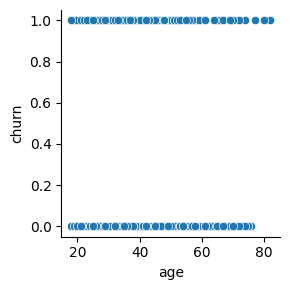

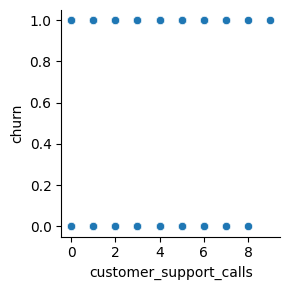

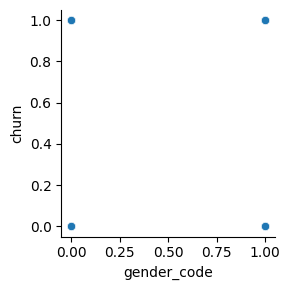

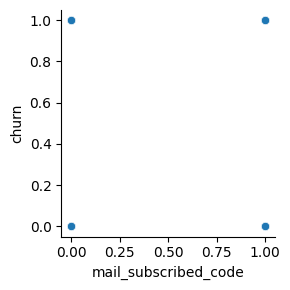

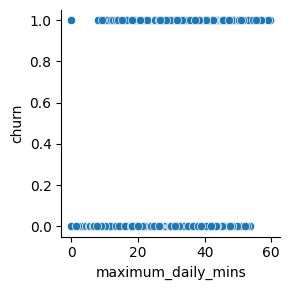

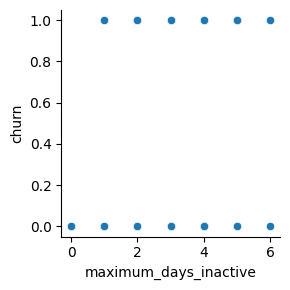

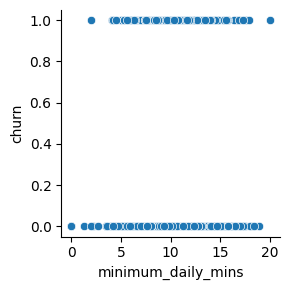

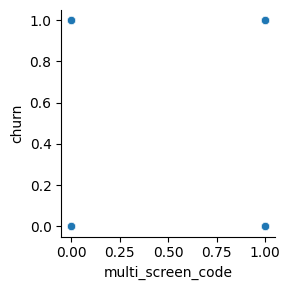

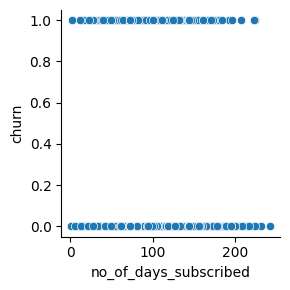

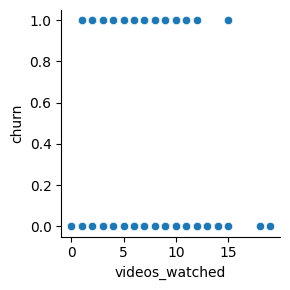

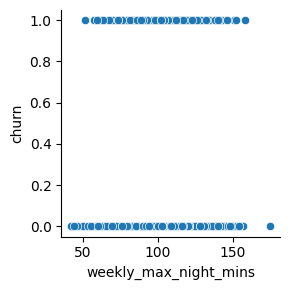

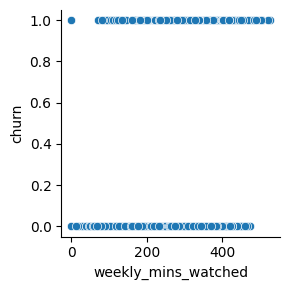

In [ ]:
# plot
plot_scatterplots (df,['customer_id','phone_no', 'year'],'churn')

In [ ]:
def full_diagnostic(df,class_col): #,cols_to_exclude):

  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  #X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  sns.pairplot(X, hue = class_col)

In [ ]:
#full_diagnostic(df, class_col = 'churn')#, cols_to_exclude=['customer_id','phone_no', 'year'])
# cols=df.select_dtypes(include=np.number).columns.tolist()
# X=df[cols]
# X = X[X.columns.difference(['churn'])]
# sns.pairplot(df, hue = df['churn'])

In [ ]:
# function for creating plots for selective columns only
def selected_diagnotic(df,class_col,cols_to_eval):
  cols_to_eval.append(class_col)
  X = df[cols_to_eval] # only selective columns
  sns.pairplot(X,hue = class_col) # plot

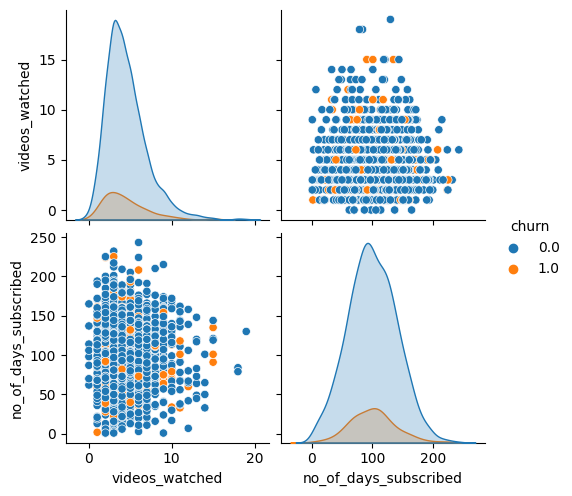

In [ ]:
selected_diagnotic(df,class_col = 'churn',cols_to_eval = ['videos_watched','no_of_days_subscribed'])

In [ ]:
df = df.drop(cat_cols, axis=1)
df.shape

(1918, 13)

In [ ]:
df.head().append(df.tail())

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_code,multi_screen_code,mail_subscribed_code
0,36,62,148.35,12.2,16.81,82,1,4.0,1,0.0,0.0,0.0,0.0
1,39,149,294.45,7.7,33.37,87,3,3.0,2,0.0,0.0,0.0,0.0
2,65,126,87.30,11.9,9.89,91,1,4.0,5,1.0,0.0,0.0,0.0
3,24,131,321.30,9.5,36.41,102,4,3.0,3,0.0,0.0,0.0,1.0
4,40,191,243.00,10.9,27.54,83,7,3.0,1,0.0,0.0,0.0,0.0
1990,32,61,67.50,9.8,7.65,94,6,3.0,2,0.0,1.0,0.0,0.0
1991,49,50,460.65,8.0,52.21,109,3,3.0,0,0.0,1.0,1.0,1.0
1992,42,119,176.70,7.6,20.03,76,3,3.0,3,0.0,0.0,0.0,1.0
1996,45,127,273.45,9.3,30.99,116,3,3.0,1,0.0,1.0,0.0,0.0
1999,37,73,326.70,10.3,37.03,89,6,3.0,1,1.0,1.0,0.0,0.0


In [ ]:
df['churn'].value_counts()

0.0    1665
1.0     253
Name: churn, dtype: int64

In [ ]:
df['churn'].value_counts(normalize=True)

0.0    0.868092
1.0    0.131908
Name: churn, dtype: float64

# **logistic regression**

In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report


In [ ]:
def logistic_regression(df,class_col):

  cols=df.select_dtypes(include=np.number).columns.tolist()
  X=df[cols]
  X = X[X.columns.difference([class_col])]

  ## Scaling variables
  ##from sklearn import preprocessing
  ##scaler = preprocessing.StandardScaler().fit(X)
  ##X_scaled = scaler.transform(X)
  #X_Scale = scaler.transform(X)
  y=df[class_col] # the target variable
  logit_model=sm.Logit(y,X)
  result=logit_model.fit() # fit the model
  print(result.summary2()) # check for summary


logistic_regression(df,class_col = 'churn')

Optimization terminated successfully.
         Current function value: 0.336585
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.137     
Dependent Variable:   churn              AIC:                1315.1404 
Date:                 2023-05-23 06:13   BIC:                1381.8488 
No. Observations:     1918               Log-Likelihood:     -645.57   
Df Model:             11                 LL-Null:            -748.02   
Df Residuals:         1906               LLR p-value:        7.1751e-38
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
age                    -0.0208   0.0068 -3.0739 0.0021  -0.0340

In [ ]:
## Scaling variables
from sklearn.preprocessing import StandardScaler

def logistic_regression_scale(df, class_col):

  cols=df.select_dtypes(include=np.number).columns.tolist()
  X=df[cols]
  X = X[X.columns.difference([class_col])]

  scaler = StandardScaler().fit(X)
  X_scaled = scaler.transform(X)
  y = df[class_col]                  # the target variable
  logit_model=sm.Logit(y, X_scaled)
  result=logit_model.fit()           # fit the model
  print(result.summary2())           # check for summary

logistic_regression_scale(df,class_col = 'churn')

Optimization terminated successfully.
         Current function value: 0.655564
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.681   
Dependent Variable: churn            AIC:              2538.7422
Date:               2023-05-23 06:14 BIC:              2605.4506
No. Observations:   1918             Log-Likelihood:   -1257.4  
Df Model:           11               LL-Null:          -748.02  
Df Residuals:       1906             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
------------------------------------------------------------------
       Coef.    Std.Err.      z      P>|z|      [0.025     0.975] 
------------------------------------------------------------------
x1     0.0211     0.0475    0.4447   0.6565     -0.0720     0.1142
x2     0.3197     0.0492    6.5036   0.0000      0.2233     0.4160
x3 

In [ ]:
# logistic_regression(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])
logistic_regression(df,class_col = 'churn')

Optimization terminated successfully.
         Current function value: 0.336585
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.137     
Dependent Variable:   churn              AIC:                1315.1404 
Date:                 2023-04-25 08:48   BIC:                1381.8488 
No. Observations:     1918               Log-Likelihood:     -645.57   
Df Model:             11                 LL-Null:            -748.02   
Df Residuals:         1906               LLR p-value:        7.1751e-38
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
age                    -0.0208   0.0068 -3.0739 0.0021  -0.0340

In [ ]:
import math
math.exp(1.9511)
math.exp(-0.0208)

0.9794148279480585

**Run the ML Model**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
## Split in training and test set

def prepare_model(df,class_col):
  ##Selecting only the numerical columns and excluding the columns we specified in the function
  cols=df.select_dtypes(include=np.number).columns.tolist()
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  #X = X[X.columns.difference(cols_to_exclude)]
  ##Selecting y as a column
  y = df[class_col]
  global X_train, X_test, y_train, y_test #This allow us to do call these variables outside this function
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # perform train test split

In [ ]:
def run_model(X_train,X_test,y_train,y_test):

  global logreg #Defines the logistic model as a global model that can be used outside of this function
  ##Fitting the logistic regression
  logreg = LogisticRegression(random_state = 13)
  logreg.fit(X_train, y_train) # fit the model
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = logreg.predict(X_test) # make predictions on th test data
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  print(classification_report(y_test, y_pred)) # check for classification report
  print("The area under the curve is: %0.2f"%logit_roc_auc)  # check for  AUC



def run_model_scaled(X_train,X_test,y_train,y_test):

  global logreg1 #Defines the logistic model as a global model that can be used outside of this function
  ##Fitting the logistic regression
  logreg1 = LogisticRegression(random_state = 13)
  sc = StandardScaler()
  sc.fit(X_train)
  X_train = sc.transform(X_train)
  X_test = sc.transform(X_test)

  logreg1.fit(X_train, y_train) # fit the model
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = logreg1.predict(X_test) # make predictions on th test data
  logit_roc_auc = roc_auc_score(y_test, logreg1.predict(X_test))
  print(classification_report(y_test, y_pred)) # check for classification report
  print("The area under the curve (Scaled Data) is: %0.2f"%logit_roc_auc)  # check for  AUC

In [ ]:
prepare_model(df,class_col='churn') #,cols_to_exclude=['customer_id','phone_no', 'year'])

In [ ]:
prepare_model(df,class_col='churn')
run_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       513
         1.0       0.47      0.13      0.20        63

    accuracy                           0.89       576
   macro avg       0.69      0.55      0.57       576
weighted avg       0.85      0.89      0.86       576

The area under the curve is: 0.55


In [ ]:
prepare_model(df,class_col='churn')
run_model_scaled(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       513
         1.0       0.46      0.17      0.25        63

    accuracy                           0.89       576
   macro avg       0.68      0.57      0.60       576
weighted avg       0.86      0.89      0.86       576

The area under the curve (Scaled Data) is: 0.57


In [ ]:
def confusion_matrix_fun(y_test,y_pred):

  confusion_matrix1 = confusion_matrix(y_test, y_pred) # confusion matrix
  print(confusion_matrix1)

  tn, fp, fn, tp = confusion_matrix1.ravel()
  print('TN: %0.2f'% tn)
  print('TP: %0.2f'% tp)
  print('FP: %0.2f'%fp)
  print('FN: %0.2f'%fn)

In [ ]:
def roc_curve_fun(logreg, X_test, y_test):

  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score
  fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test)) # ROC curve
  #Setting the graph area
  plt.figure()
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  #Plotting the worst line possiple
  plt.plot([0, 1], [0, 1],'b--')

  #Plotting the logistic regression we have built
  plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

  #Adding labels and etc
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

In [ ]:

prepare_model(df,class_col='churn')

In [ ]:
confusion_matrix_fun(y_test,y_pred)

[[500  13]
 [ 52  11]]
TN: 500.00
TP: 11.00
FP: 13.00
FN: 52.00


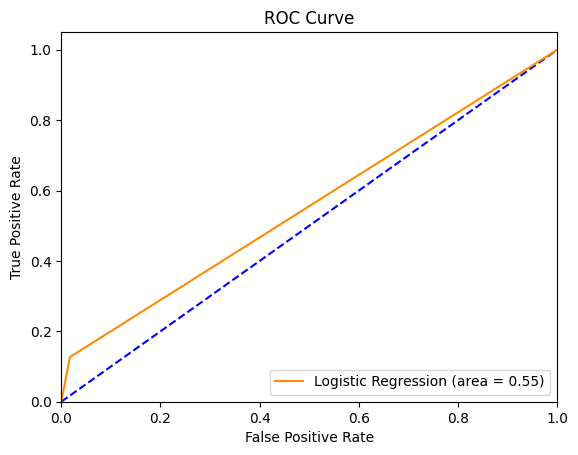

In [ ]:
roc_curve_fun(logreg, X_test, y_test)

# **Saving & Running the Model**

In [ ]:
# save the model using pickle function
import pickle
pickle.dump(logreg, open('model1.pkl', 'wb'))

In [ ]:
# load the saved model
model = pickle.load(open('model1.pkl', 'rb'))

In [ ]:
# make predictions on the test data
model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# **Dealing with Class Imbalance**

In [ ]:
# check the target variable
df['churn'].describe()

count    1918.000000
mean        0.131908
std         0.338479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

In [ ]:
# class imbalance method 1 : class_weight = 'balanced'
def run_model_bweights(X_train,X_test,y_train,y_test):

    global logreg
    logreg = LogisticRegression(random_state = 13, class_weight = 'balanced') # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc) # AUC curve

In [ ]:
run_model_bweights(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       513
         1.0       0.27      0.78      0.40        63

    accuracy                           0.75       576
   macro avg       0.62      0.76      0.62       576
weighted avg       0.89      0.75      0.79       576

The area under the curve is: 0.76


In [ ]:
# class imbalance method 2 : class_weight = {0:90, 1:10}
def run_model_aweights(X_train,X_test,y_train,y_test,w):

    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight=w) # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))  # ROC AUC score
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc)  # AUC curve

In [ ]:
df['churn'].value_counts(normalize=True)

0.0    0.868092
1.0    0.131908
Name: churn, dtype: float64

In [ ]:
run_model_aweights(X_train,X_test,y_train,y_test, {0:90, 1:10})

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       513
         1.0       1.00      0.02      0.03        63

    accuracy                           0.89       576
   macro avg       0.95      0.51      0.49       576
weighted avg       0.90      0.89      0.84       576

The area under the curve is: 0.51


In [ ]:
run_model_aweights(X_train,X_test,y_train,y_test, {0:85, 1:15})

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       513
         1.0       1.00      0.02      0.03        63

    accuracy                           0.89       576
   macro avg       0.95      0.51      0.49       576
weighted avg       0.90      0.89      0.84       576

The area under the curve is: 0.51


In [ ]:
# class imbalance method 3: resample
def adjust_imbalance (X_train,y_train,class_col):
  from sklearn.utils import resample
  import pandas as pd
  X = pd.concat([X_train, y_train], axis=1)

  # separate the 2 classes
  class0 = X[X[class_col]==0]
  class1 = X[X[class_col]==1]

  # Case 1 - bootstraps from the minority class
  if len(class1)<len(class0):
    resampled = resample(class1,
                              replace=True,
                              n_samples=len(class0),
                              random_state=10)
    resampled_df = pd.concat([resampled, class0])

  # Case 1 - ressamples from the majority class
  else:
    resampled = resample(class1,
                              replace=False,
                              n_samples=len(class0),
                              random_state=10)
    resampled_df = pd.concat([resampled, class0])

  return resampled_df

In [ ]:
resampled_df = adjust_imbalance (X_train,y_train,class_col = 'churn')

In [ ]:
prepare_model(resampled_df,class_col = 'churn')
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71       339
         1.0       0.73      0.65      0.69       353

    accuracy                           0.70       692
   macro avg       0.70      0.70      0.70       692
weighted avg       0.70      0.70      0.70       692

The area under the curve is: 0.70


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from imblearn.over_sampling import SMOTE

In [ ]:
# class imbalance method 4:
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input.


def prepare_model_smote(df,class_col):
  cols=df.select_dtypes(include=np.number).columns.tolist()
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  #X = X[X.columns.difference(cols_to_exclude)]
  y = df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
prepare_model_smote(df,class_col = 'churn')
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83       513
         1.0       0.26      0.78      0.39        63

    accuracy                           0.73       576
   macro avg       0.61      0.75      0.61       576
weighted avg       0.89      0.73      0.78       576

The area under the curve is: 0.75


**Predictions**

In [ ]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83       513
         1.0       0.26      0.78      0.39        63

    accuracy                           0.73       576
   macro avg       0.61      0.75      0.61       576
weighted avg       0.89      0.73      0.78       576

The area under the curve is: 0.75


In this problem we focus on recall, to reduce FN, that is the customer will Churn but model predicted Customer will not churn, So model fails to identify the customer. To get higher Recall value the FN should be lower.

# **Feature selection**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from sklearn import preprocessing

In [ ]:
df = data.copy()
encode_categories(df, cat_cols)

The encoded values for gender are:
[ 0. nan  1.]
The encoded values for multi_screen are:
[0. 1.]
The encoded values for mail_subscribed are:
[0. 1.]


In [ ]:
class_col = 'churn'
cols_to_exclude=['customer_id','phone_no', 'year']

# function for feature selection
def var_threshold_selection(df,cols_to_exclude,class_col,threshold):


  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  ## Scaling variables
  scaler = preprocessing.StandardScaler().fit(X)
  X_scaled = scaler.transform(X)
  var_thr = VarianceThreshold(threshold = threshold) #Removing both constant and quasi-constant
  var_thr.fit(X_scaled)
  var_thr.get_support()

  global selected_cols
  selected_cols = X.columns[var_thr.get_support()]

  print("The selected features are: ")
  print(list(selected_cols))

In [ ]:
var_threshold_selection(df,cols_to_exclude=['customer_id','phone_no', 'year'],class_col = 'churn', threshold=1)

The selected features are: 
['age', 'customer_support_calls', 'mail_subscribed_code', 'minimum_daily_mins', 'multi_screen_code']


In [ ]:
def prepare_model(df,class_col, cols_to_exclude):
  ##Selecting only the numerical columns and excluding the columns we specified in the function
  cols=df.select_dtypes(include=np.number).columns.tolist()
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  ##Selecting y as a column
  y = df[class_col]
  global X_train, X_test, y_train, y_test #This allow us to do call these variables outside this function
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # perform train test split

In [ ]:
prepare_model(resampled_df,class_col = 'churn', cols_to_exclude=['customer_id','phone_no', 'year',
                                                                'gender', 'age',
                                                                'no_of_days_subscribed', 'multi_screen', 'mail_subscribed', 'minimum_daily_mins',
                                                                'weekly_max_night_mins', 'videos_watched',
                                                                'customer_support_calls', 'churn', 'gender_code', 'multi_screen_code',
                                                                'mail_subscribed_code'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.57      0.62      0.59       339
         1.0       0.60      0.55      0.57       353

    accuracy                           0.58       692
   macro avg       0.58      0.58      0.58       692
weighted avg       0.59      0.58      0.58       692

The area under the curve is: 0.58


In [ ]:
# with resample df and variance threshold= 1 selected feature in prepare model
# The selected features are:
# ['age', 'customer_support_calls', 'mail_subscribed_code', 'minimum_daily_mins', 'multi_screen_code']

prepare_model(resampled_df,class_col = 'churn', cols_to_exclude=['customer_id','phone_no', 'year',
                                                                'gender',
                                                                'no_of_days_subscribed', 'multi_screen', 'mail_subscribed', 'weekly_mins_watched', 'maximum_daily_mins',
                                                                'weekly_max_night_mins', 'videos_watched',  'churn', 'gender_code'
                                                                ])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.66      0.81      0.73       339
         1.0       0.76      0.61      0.68       353

    accuracy                           0.70       692
   macro avg       0.71      0.71      0.70       692
weighted avg       0.71      0.70      0.70       692

The area under the curve is: 0.71


In [ ]:
from sklearn.feature_selection import RFE

## RFE for feature selection

In [ ]:
# RFE for feature selection
def rfe_selection(df,cols_to_exclude,class_col,model):


  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  y = df[class_col]

  rfe = RFE(model)
  rfe = rfe.fit(X, y) # fit the model
  global selected_cols
  selected_cols = X.columns[rfe.support_]

  print("The selected features are: ")
  print(list(selected_cols))


In [ ]:
rfe_selection(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'],model=logreg)

The selected features are: 
['customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_days_inactive', 'minimum_daily_mins', 'multi_screen_code']


In [ ]:
prepare_model(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year',
                                                                'gender', 'age',
                                                                'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
                                                                'weekly_max_night_mins',
                                                                 'gender_code', 'multi_screen_code',
                                                                'mail_subscribed_code'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       339
         1.0       0.71      0.69      0.70       353

    accuracy                           0.70       692
   macro avg       0.70      0.70      0.70       692
weighted avg       0.70      0.70      0.70       692

The area under the curve is: 0.70


RFE method is good for Feature selection than VarianceThreshold Selection

## Weight of Evidence & Information Value

Information value (IV) is a commonly used metric for evaluating the predictive power of a feature. It measures how well the feature separates the positive and negative classes. A higher IV indicates a stronger predictive power.

In [ ]:
df = data.copy()
encode_categories(df, cat_cols)
drop_cols = ['year', 'customer_id', 'phone_no']+cat_cols
df = df.drop(drop_cols, axis=1)
df.shape


The encoded values for gender are:
[ 0. nan  1.]
The encoded values for multi_screen are:
[0. 1.]
The encoded values for mail_subscribed are:
[0. 1.]


(2000, 13)

In [ ]:
df.head()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_code,multi_screen_code,mail_subscribed_code
0,36,62,148.35,12.2,16.81,82,1,4.0,1,0.0,0.0,0.0,0.0
1,39,149,294.45,7.7,33.37,87,3,3.0,2,0.0,0.0,0.0,0.0
2,65,126,87.30,11.9,9.89,91,1,4.0,5,1.0,0.0,0.0,0.0
3,24,131,321.30,9.5,36.41,102,4,3.0,3,0.0,0.0,0.0,1.0
4,40,191,243.00,10.9,27.54,83,7,3.0,1,0.0,0.0,0.0,0.0


In [ ]:
# !pip install woe
# !pip install category_encoders
# !pip install woe-scoring

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import woe
import category_encoders.woe as ce
import pandas as pd
from woe_scoring import WOETransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df = data.copy()
df = df.dropna()

In [ ]:
feature_cols =  ['gender', 'multi_screen', 'mail_subscribed']
target_col = 'churn'
y = df[target_col]
y.unique()

array([0., 1.])

In [ ]:
ce.WOEEncoder(feature_cols)

WOEEncoder(verbose=['gender', 'multi_screen', 'mail_subscribed'])

In [ ]:
# Create a WOE encoder
encoder = ce.WOEEncoder(cols=feature_cols)

# Fit the encoder on the data
encoder.fit(df[feature_cols], y)

# Transform the data using the encoder
df_woe = encoder.transform(df[feature_cols])

# Print the WOE and IV for each feature
# for col, woe_val, iv_val in zip(df_woe.columns, encoder.woe_, encoder.iv_):
#     print(f'Feature: {col}, WOE: {woe_val}, IV: {iv_val}')

In [ ]:
df_woe

,gender,multi_screen,mail_subscribed
0,0.026098,-0.298009,0.125964
1,0.026098,-0.298009,0.125964
2,0.026098,-0.298009,0.125964
3,0.026098,-0.298009,-0.379829
4,0.026098,-0.298009,0.125964
...,...,...,...
1990,-0.023355,-0.298009,0.125964
1991,-0.023355,1.484791,-0.379829
1992,0.026098,-0.298009,-0.379829
1996,-0.023355,-0.298009,0.125964


In [ ]:
df['churn'].value_counts()

0.0    1703
1.0     262
Name: churn, dtype: int64

<Axes: xlabel='value'>

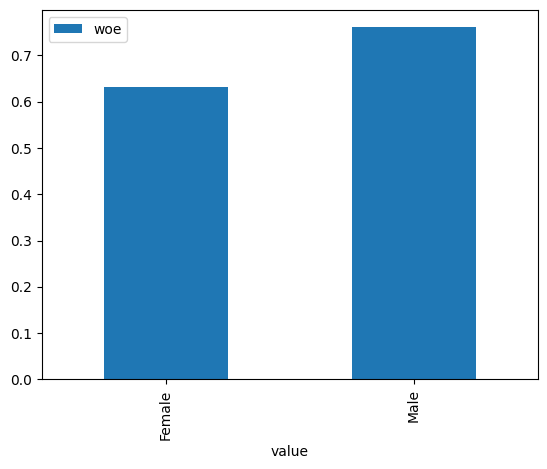

In [ ]:
# Create a function to calculate the weight of evidence
def woe(col, target):
    # Get the unique values of the column
    unique_values = col.unique()

    # Create a DataFrame to store the results
    woe_df = pd.DataFrame()

    # Loop over the unique values
    for value in unique_values:
        # Get the proportion of the target variable that is equal to 1 for each value
        proportion_1 = (col == value).sum() / len(col)

        # Get the log odds of the target variable being equal to 1 for each value
        log_odds = np.log(proportion_1 / (1 - proportion_1))

        # Calculate the weight of evidence
        woe = log_odds - np.log(proportion_1)

        # Add the weight of evidence to the DataFrame
        woe_df = woe_df.append({'value': value, 'woe': woe}, ignore_index=True)

    return woe_df

# Apply the function to each category of the categorical feature
woe_df = woe(df['gender'], df['churn'])

# Plot the weight of evidence values
woe_df.plot(x='value', y='woe', kind='bar')

In [ ]:
woe_df

,value,woe
0,Female,0.630500
1,Male,0.759982


In [ ]:
def woe(df, Categorical_Feature, target, x):
    d = df[df[target] == 1][Categorical_Feature].value_counts().to_dict()
    good = df[df[target] == 1][Categorical_Feature].value_counts()[x]
    bad = df[df[target] == 0][Categorical_Feature].value_counts()[x]
    return np.log( (good/d['Male']) / (bad/d['Female']))

woe(df, 'gender', 'churn', 'Female')

-1.9453733515761076

In [ ]:



def iv(df, Categorical_Feature, target, x):
    good = df[df[target] == 1][Categorical_Feature].value_counts()[x]
    bad = df[df[target] == 0][Categorical_Feature].value_counts()[x]
    woe = np.log(good / bad)
    return woe * (good / len(df)) * (1 - good / len(df))

iv(df, 'gender', 'churn', 'Female')

-0.1098415245797619

In [ ]:
X = df.drop('churn', axis=1)
y = df[['churn']].values

https://github.com/kiraplenkin/woe_scoring

['age',
 'no_of_days_subscribed',
 'weekly_mins_watched',
 'minimum_daily_mins',
 'maximum_daily_mins',
 'weekly_max_night_mins',
 'videos_watched',
 'maximum_days_inactive',
 'customer_support_calls',
 'gender_code',
 'multi_screen_code',
 'mail_subscribed_code']